In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

In [3]:
df5 = pd.read_csv("Social_Network_Ads.csv")
df5

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df5.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df5.shape

(400, 5)

In [9]:
df5.drop(['User ID'], axis=1, inplace=True)

In [11]:
df5

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
df5.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
df5.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


(3, 3)


<Axes: >

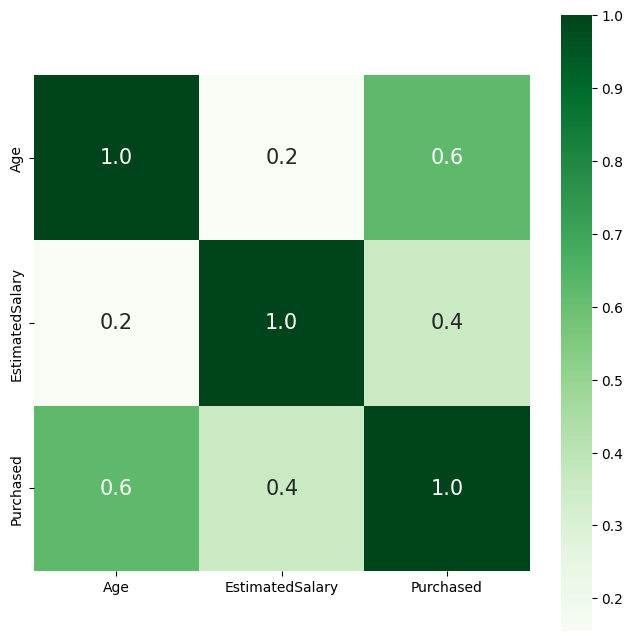

In [17]:
df5_without_male = df5.drop('Gender', axis=1)
corr = df5_without_male.corr()
print(corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


In [19]:
X = df5.drop(['Gender', 'Purchased'], axis=1)
Y = df5['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [23]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [25]:
basemodel = LogisticRegression()
basemodel.fit(X_train, y_train)
print("Training accuracy:", basemodel.score(X_train, y_train) * 100)

Training accuracy: 83.75


In [27]:
y_predict = basemodel.predict(X_test)
print("Testing accuracy:", basemodel.score(X_test, y_test) * 100)

Testing accuracy: 88.75


In [29]:
scaler=MinMaxScaler()

In [31]:
X=df5[['Age','EstimatedSalary']]
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [33]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5


In [35]:
Acc=accuracy_score(y_test,y_predict)
print(Acc)

0.875


In [37]:
cm= confusion_matrix(y_test,y_predict)
print(cm)

[[51  1]
 [ 9 19]]


In [39]:
prf= precision_recall_fscore_support(y_test,y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.85 0.95]
Recall: [0.98076923 0.67857143]
fscore: [0.91071429 0.79166667]
support: [52 28]


In [41]:
cr= classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

